In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau, norm, f 

In [5]:
df = pd.read_csv('/Users/anastasiaintyakova/Documents/labs/students_simple.csv')

In [39]:
df.head()

,height,mass,income,iq,pages,age,bmi,work_exp,friends,test_time
0,159,45,430,95,24,20,3.533,26,5,8.5
1,160,61,640,115,32,25,2.623,63,7,6.2
2,161,56,610,111,24,28,2.875,94,10,6.8
3,162,48,330,97,24,19,3.375,16,4,12.0
4,162,54,420,105,60,23,3.000,49,2,7.5


In [38]:
df.columns

Index(['height', 'mass', 'income', 'iq', 'pages', 'age', 'bmi', 'work_exp',
       'friends', 'test_time'],
      dtype='object')

In [7]:
N = 10
columns = ['height', 'mass', 'income', 'iq', 'pages', 'age', 'bmi', 'work_exp', 'friends', 'test_time']
col1 = columns[N%5]
col2 = columns[N**2 % 5 + 5]
print(f"Выбранные столбцы для анализа: {col1} и {col2}")

Выбранные столбцы для анализа: height и age


## 1.  Расчет корреляций

In [8]:
median_h = df[col1].median()
median_a = df[col2].median()

sign_h = np.sign(df[col1] - median_h)
sign_a = np.sign(df[col2] - median_a)

fechner_corr = (sign_h * sign_a).sum() / len(df)

print(f"Коэффициент Фехнера: {fechner_corr:.4f}")

Коэффициент Фехнера: 0.1000


In [9]:
r, p_value = pearsonr(df[col1], df[col2])

z = np.arctanh(r)
se = 1.0 / np.sqrt(len(df) - 3)
alpha = 0.05
z_crit = norm.ppf(1 - alpha / 2) 

z_lower = z - z_crit * se
z_upper = z + z_crit * se

r_lower = np.tanh(z_lower)
r_upper = np.tanh(z_upper)

print(f"Коэффициент Пирсона (r): {r:.4f}")
print(f"P-значение (p-value): {p_value:.4f}")
print(f"95% Доверительный интервал: [{r_lower:.4f}, {r_upper:.4f}]")

Коэффициент Пирсона (r): 0.1944
P-значение (p-value): 0.4115
95% Доверительный интервал: [-0.2715, 0.5865]


In [10]:
rho, p_value = spearmanr(df[col1], df[col2])

print(f"Коэффициент Спирмена (rho): {rho:.4f}")
print(f"P-значение (p-value): {p_value:.4f}")

Коэффициент Спирмена (rho): 0.1750
P-значение (p-value): 0.4605


In [11]:
tau, p_value = kendalltau(df[col1], df[col2])

print(f"Коэффициент Кендалла (tau): {tau:.4f}")
print(f"P-значение (p-value): {p_value:.4f}")

Коэффициент Кендалла (tau): 0.1223
P-значение (p-value): 0.4698


## 2. Визуализация

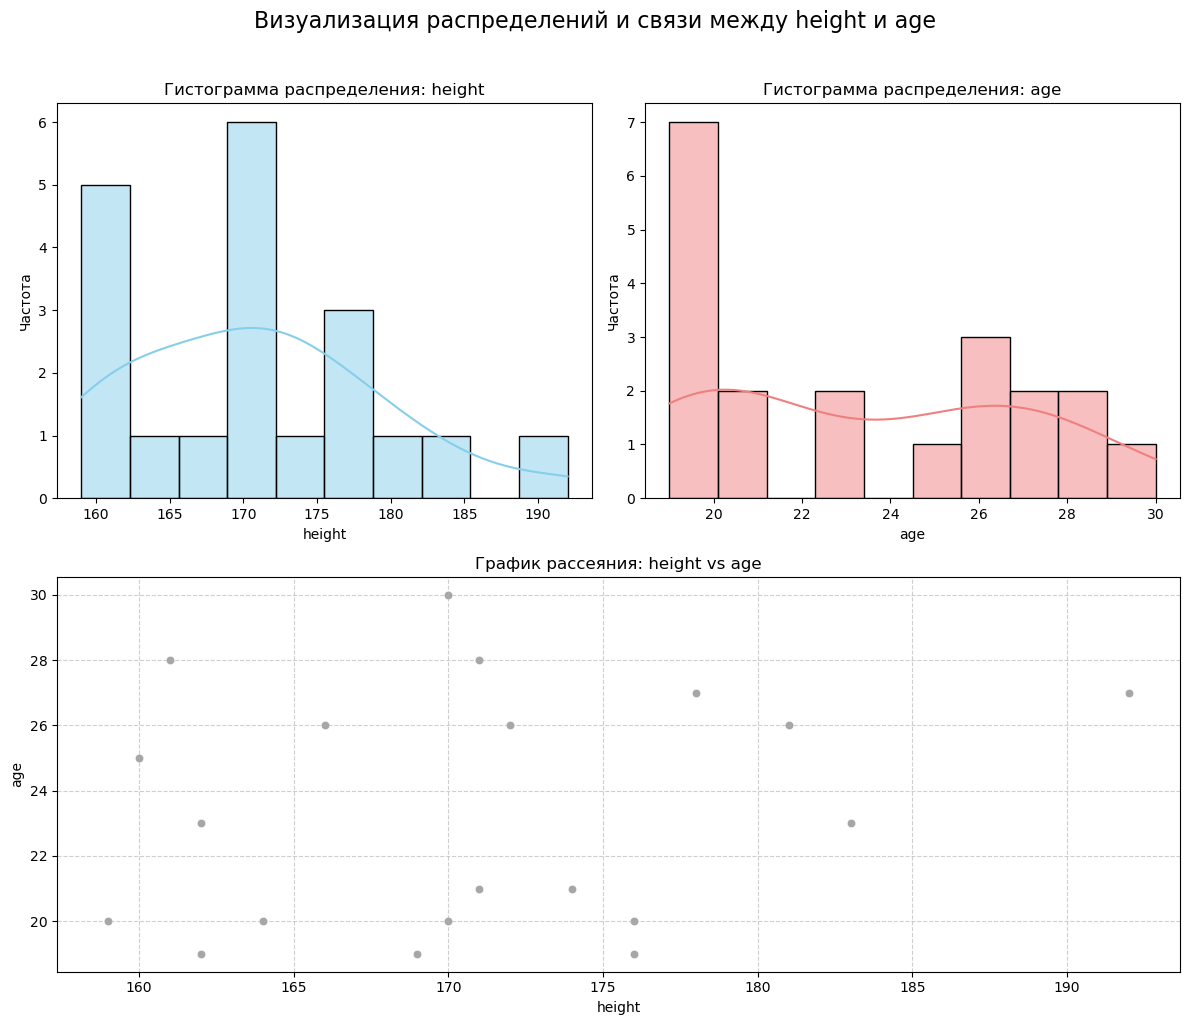

In [46]:
plt.figure(figsize=(12, 10))
plt.suptitle('Визуализация распределений и связи между height и age', y=1.02, fontsize=16)

plt.subplot(2, 2, 1) 
sns.histplot(df[col1], kde=True, color='skyblue', bins=10)
plt.title(f'Гистограмма распределения: {col1}')
plt.xlabel(col1)
plt.ylabel('Частота')

plt.subplot(2, 2, 2)
sns.histplot(df[col2], kde=True, color='lightcoral', bins=10)
plt.title(f'Гистограмма распределения: {col2}')
plt.xlabel(col2)
plt.ylabel('Частота')

plt.subplot(2, 1, 2) 
sns.scatterplot(x=df[col1], y=df[col2], data=df, alpha=0.7, color='gray')
plt.title(f'График рассеяния: {col1} vs {col2}')
plt.xlabel(col1)
plt.ylabel(col2)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() 
plt.show()
plt.close()

## 3. Уравнение регрессии

In [17]:
X = df[col1].values
Y = df[col2].values
n = len(X)

In [18]:
sum_xy = np.sum(X * Y)
sum_x = np.sum(X)
sum_y = np.sum(Y)
sum_x2 = np.sum(X**2)

In [19]:
w1_lin = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
w0_lin = np.mean(Y) - w1_lin * np.mean(X)

print(f"Линейная регрессия: y = {w1_lin:.4f} * x + {w0_lin:.4f}")

Y_pred_lin = w1_lin * X + w0_lin

Линейная регрессия: y = 0.0823 * x + 9.3470


In [20]:
w2_quad, w1_quad, w0_quad = np.polyfit(X, Y, 2)

print(f"Квадратичная регрессия: y = {w2_quad:.4f} * x^2 + {w1_quad:.4f} * x + {w0_quad:.4f}")

Y_pred_quad = w2_quad * X**2 + w1_quad * X + w0_quad

Квадратичная регрессия: y = 0.0053 * x^2 + -1.7715 * x + 169.6891


In [21]:
Z = 1 / X

w1_hyp, w0_hyp = np.polyfit(Z, Y, 1)

print(f"Гиперболическая регрессия: y = {w1_hyp:.4f} / x + {w0_hyp:.4f}")

Y_pred_hyp = w1_hyp / X + w0_hyp

Гиперболическая регрессия: y = -2351.7113 / x + 37.1970


In [22]:
Y_log = np.log(Y)

w1_prime, w0_prime = np.polyfit(X, Y_log, 1)

w1_exp = np.exp(w0_prime) 
w0_exp = np.exp(w1_prime) 

print(f"Показательная регрессия: y = {w1_exp:.4f} * {w0_exp:.4f}^x")

Y_pred_exp = w1_exp * (w0_exp**X)

Показательная регрессия: y = 12.4755 * 1.0036^x


In [44]:
X_sort = np.sort(X)

Y_fit_lin   = w1_lin * X_sort + w0_lin
Y_fit_quad  = w2_quad * X_sort**2 + w1_quad * X_sort + w0_quad
Y_fit_hyp   = w1_hyp / X_sort + w0_hyp
Y_fit_exp   = w1_exp * (w0_exp**X_sort)

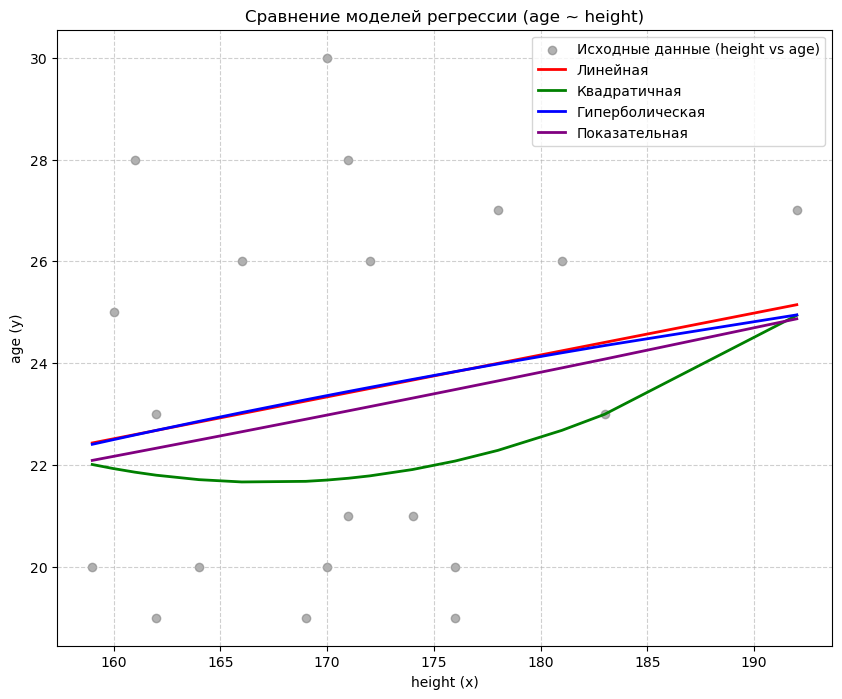

In [45]:
plt.figure(figsize=(10, 8))
plt.scatter(X, Y, label='Исходные данные (height vs age)', alpha=0.6, color='gray')

plt.plot(X_sort, Y_fit_lin,   color='red',   linewidth=2, label=f'Линейная')
plt.plot(X_sort, Y_fit_quad,  color='green', linewidth=2, label='Квадратичная')
plt.plot(X_sort, Y_fit_hyp,   color='blue',  linewidth=2, label='Гиперболическая')
plt.plot(X_sort, Y_fit_exp,   color='purple',linewidth=2, label='Показательная')


plt.title('Сравнение моделей регрессии (age ~ height)')
plt.xlabel('height (x)')
plt.ylabel('age (y)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 4. Проверка уравнения регрессии

In [27]:
Y_mean = np.mean(Y)

SST = np.sum((Y - Y_mean)**2)

In [28]:
def calculate_r_squared_and_f_test(Y, Y_pred, n, k):
    SSE = np.sum((Y - Y_pred)**2)
    
    SSR = np.sum((Y_pred - Y_mean)**2)
    
    R_squared = 1 - (SSE / SST)

    df1 = k                
    df2 = n - k - 1           

    if df2 <= 0:
        F_stat = np.nan
        p_value = np.nan
    else:
        MSR = SSR / df1       
        MSE = SSE / df2       
        F_stat = MSR / MSE
        p_value = 1 - f.cdf(F_stat, df1, df2)

    return R_squared, F_stat, p_value, k 

In [29]:
results = {}
results['Линейная'] = calculate_r_squared_and_f_test(Y, Y_pred_lin, n, k=1)
results['Квадратичная'] = calculate_r_squared_and_f_test(Y, Y_pred_quad, n, k=2)
results['Гиперболическая'] = calculate_r_squared_and_f_test(Y, Y_pred_hyp, n, k=1)
results['Показательная'] = calculate_r_squared_and_f_test(Y, Y_pred_exp, n, k=1)

results_df = pd.DataFrame.from_dict(
    {model: {'R2': r[0], 'F_stat': r[1], 'p_value': r[2], 'k': r[3]}
     for model, r in results.items()},
    orient='index'
)
results_df.index.name = 'Model'

In [30]:
best_model = results_df['R2'].idxmax()
worst_model = results_df['R2'].idxmin()

print("--- Проверка уравнения регрессии (Критерий Фишера) ---")
print(results_df[['R2', 'F_stat', 'p_value', 'k']].to_markdown(floatfmt=".4f"))
print(f"\nНаилучшая модель (по R^2): {best_model}")
print(f"Наихудшая модель (по R^2): {worst_model}")

--- Проверка уравнения регрессии (Критерий Фишера) ---
| Model           |      R2 |   F_stat |   p_value |      k |
|:----------------|--------:|---------:|----------:|-------:|
| Линейная        |  0.0378 |   0.7077 |    0.4113 | 1.0000 |
| Квадратичная    | -0.0791 |   1.3907 |    0.2758 | 2.0000 |
| Гиперболическая |  0.0347 |   0.6467 |    0.4318 | 1.0000 |
| Показательная   |  0.0297 |   0.8942 |    0.3569 | 1.0000 |

Наилучшая модель (по R^2): Линейная
Наихудшая модель (по R^2): Квадратичная


## 5. Выводы по лабораторной работе

### 5.1. Выводы по корреляциям (height и age)

| Коэффициент | Значение | P-значение | Вывод по силе связи | Статистическая значимость (α=0.05) |
| :--- | :--- | :--- | :--- | :--- |
| **Пирсона (r)** | 0.1944 | 0.4115 | Очень слабая прямая линейная | Не значима (p > 0.05) |
| **Спирмена (rho)**| 0.1750 | 0.4605 | Очень слабая прямая ранговая | Не значима (p > 0.05) |
| **Кендалла (tau)**| 0.1223 | 0.4698 | Очень слабая прямая ранговая | Не значима (p > 0.05) |
| **Фехнера** | 0.1000 | N/A | Слабая прямая (совпадение знаков) | N/A |

* **Доверительный интервал Пирсона:** 95% ДИ $[-0.2715, 0.5865]$ содержит ноль, что подтверждает отсутствие статистически значимой линейной связи.

### 5.2. Уравнения регрессии (age ~ height)

* **Линейная:** $y = 0.0823 \cdot x + 9.3470$
* **Квадратичная:** $y = 0.0053 \cdot x^2 - 1.7715 \cdot x + 169.6891$
* **Гиперболическая:** $y = -2351.7113 / x + 37.1970$
* **Показательная:** $y = 12.4755 \cdot 1.0036^x$

### 5.3. Проверка уравнений регрессии (Критерий Фишера)

| Модель | $R^2$ | F-статистика | P-value |
| :--- | :--- | :--- | :--- |
| **Линейная** | 0.0378 | 0.7077 | 0.4113 |
| **Квадратичная**| -0.0791 | 1.3907 | 0.2758 |
| **Гиперболическая**| 0.0347 | 0.6467 | 0.4318 |
| **Показательная**| 0.0297 | 0.8942 | 0.3569 |

* **Наилучшая модель по $R^2$:** Линейная ($R^2=0.0378$), объясняет лишь 3.78% дисперсии переменной `age`.
* **Статистическая значимость:** Для всех моделей **p-value > 0.05**. Это означает, что **ни одно** из построенных уравнений регрессии **не является статистически значимым** для описания данных, и их использование для прогнозирования возраста по росту некорректно.

### 5.4. Общее заключение

На основе проведенного анализа данных (рост `height` и возраст `age` для студента под номером $N=10$):

1.  Установлена **очень слабая, статистически не значимая** прямая связь между ростом и возрастом.
2.  Ни одна из четырех построенных регрессионных моделей (линейная, квадратичная, гиперболическая, показательная) **не подходит** для описания и прогнозирования зависимости возраста от роста, что подтверждается низким коэффициентом детерминации ($R^2$) и статистической незначимостью (p-value > 0.05) по критерию Фишера.